In [1]:
using Pkg;
Pkg.activate("../.");

using SchrodingerEquationSolver
using SchrodingerEquationSolver: Grids, Potentials, MathUtils, Hydrogen, InitialConditions,
                                 OneDSchrodingerEquationSolver, OneDPoissonEquationSolver,
                                 EigenvalueFinders, AtomBasisSet, Density, ExchangeCorrelation
using Plots

  Activating project at `~/Desktop/physics_coding_projects/julia/SchrodingerEquationSolver`


In [2]:
#Define parameters and produce an exponential grid.
r_max::Float64=35.0;#Max radius of space grid.
Z::Int64=10;#Atomic number, also used as the charge of coulomb potential.

In [3]:

#grid definition
grid_stru= Grids.init_exponential_grid_structure(r_max, Z);
N=grid_stru.N;
print("grid size ", N)


grid size 7902

In [4]:
#Initializing basis set data structure
basis= AtomBasisSet.init_atom_basis_set(Z, grid_stru.grid);

For a given $l$ we can search for possible eigensates in an energy interval. 

In [5]:
l=0;
E_min= 0.5;
E_max= 10.0;
E_N::Int64=200; #Number of points in the energy grid.
E_grid= Grids.uniform_grid(E_min, E_max, E_N); #List with the energy grid points.

In [6]:
#Initialization of potentials and energies

#Initializing coulomb potential due to nuclei charge.
w::Float64=1;
m::Float64=1;
V_harm= Potentials.harmoic_oscilator_potential(w,m,grid_stru.grid); #the list with the quantum harmonic oscillator potential

V_angu= Potentials.angular_potential(l, grid_stru.grid);

V_effe= V_harm + V_angu;

In [7]:
E_intervals= EigenvalueFinders.find_eigenvalue_intervals(E_grid, V_effe, grid_stru,
    InitialConditions.atom_exponential_grid,
    OneDSchrodingerEquationSolver.solver_exponential_grid);

In [8]:
numb_solu::Int64= size(E_intervals)[1]; #Number of potential solutions in the energy grid.
eigen_list::Vector{Float64}=zeros(numb_solu); #Initializing the list that is going to hold the energy eigenvalues.
u_wave_functions::Vector{Vector{Float64}}= [zeros(N) for _ in 1:numb_solu]; #Initializing the list that holds the eigenfunctions list.

In [9]:
#Using Illinois algorithm to find the actual energy eigenvalue and eigenfunction for everyone of the energy intervals.
for (i, ei_interval) in enumerate(E_intervals)
    u_temp, ei_temp= EigenvalueFinders.illinois_eigenvalue_finder(ei_interval, V_effe, grid_stru,
    InitialConditions.atom_exponential_grid,
    OneDSchrodingerEquationSolver.solver_exponential_grid);
    u_wave_functions[i]=u_temp;
    eigen_list[i]= ei_temp;
    println("Eigenstate ", i)
    println("Energy ", ei_temp)
end

Eigenstate 1
Energy 1.500000000000729
Eigenstate 2
Energy 3.499999999998179
Eigenstate 3
Energy 5.499999999997406
Eigenstate 4
Energy 7.500000000014921
Eigenstate 5
Energy 9.500000000033346


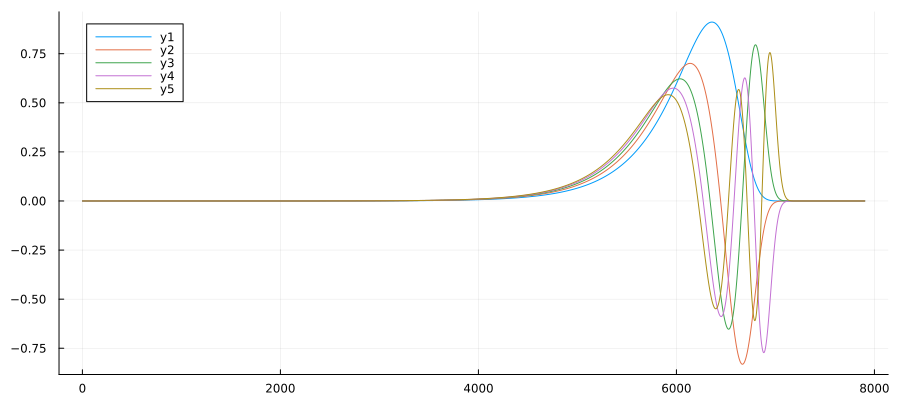

In [10]:
#Plot of the wave functions
plot!(grid_stru.grid_i, u_wave_functions)
plot!(size=(900,400))